## Option pricing using Tree

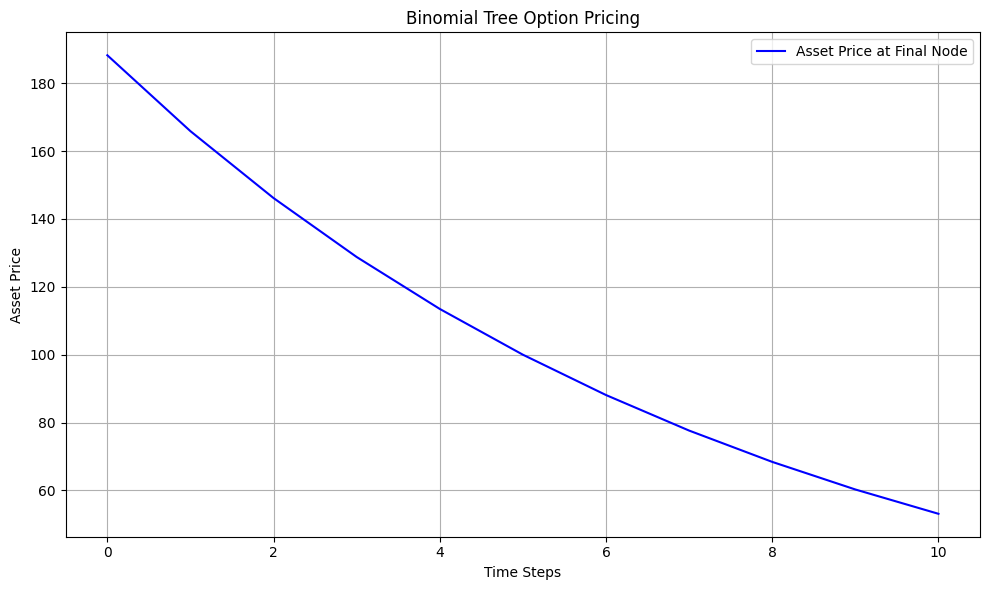

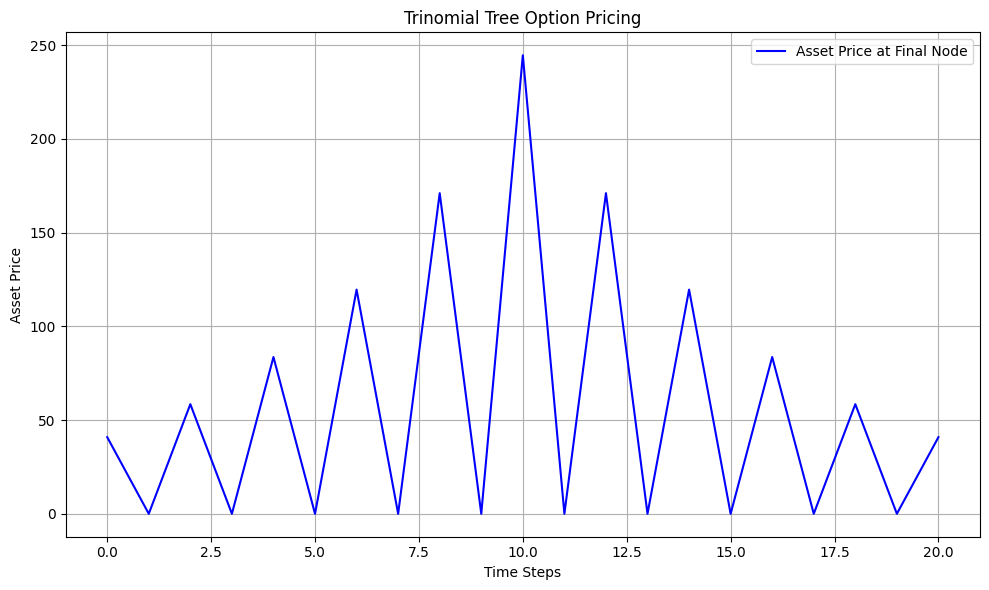

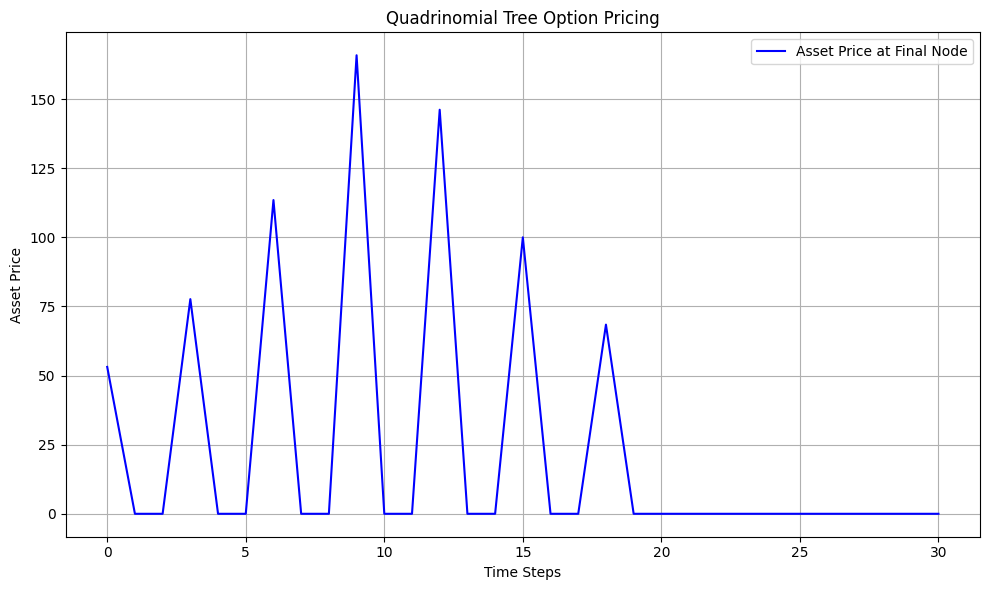

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class OptionPricing:
    def __init__(self, S0, K, r, sigma, T, N):
        self.S0 = S0
        self.K = K
        self.r = r
        self.sigma = sigma
        self.T = T
        self.N = N
        self.dt = T / N
        self.discount = np.exp(-r * self.dt)

    def binomial_tree(self):
        u = np.exp(self.sigma * np.sqrt(self.dt))
        d = 1 / u
        p = (np.exp(self.r * self.dt) - d) / (u - d)

        # Asset price tree
        asset_prices = np.zeros((self.N + 1, self.N + 1))
        option_prices = np.zeros((self.N + 1, self.N + 1))
        asset_prices[0, 0] = self.S0

        for i in range(1, self.N + 1):
            for j in range(i + 1):
                asset_prices[j, i] = self.S0 * (u ** (i - j)) * (d ** j)

        # Terminal option prices
        for j in range(self.N + 1):
            option_prices[j, self.N] = max(0, asset_prices[j, self.N] - self.K)

        # Backward induction for option pricing
        for i in range(self.N - 1, -1, -1):
            for j in range(i + 1):
                option_prices[j, i] = self.discount * (p * option_prices[j, i + 1] + (1 - p) * option_prices[j + 1, i + 1])

        return asset_prices, option_prices

    def trinomial_tree(self):
        u = np.exp(self.sigma * np.sqrt(2 * self.dt))
        d = 1 / u
        m = 1
        pu = ((np.exp(self.r * self.dt / 2) - np.exp(-self.sigma * np.sqrt(self.dt))) / (u - d))**2
        pm = 1 - 2 * pu
        pd = pu

        # Asset price tree
        asset_prices = np.zeros((2 * self.N + 1, self.N + 1))
        option_prices = np.zeros((2 * self.N + 1, self.N + 1))
        asset_prices[self.N, 0] = self.S0

        for i in range(1, self.N + 1):
            for j in range(-i, i + 1, 2):
                asset_prices[self.N + j, i] = self.S0 * (u ** (i - abs(j))) * (d ** abs(j))

        # Terminal option prices
        for j in range(-self.N, self.N + 1, 2):
            option_prices[self.N + j, self.N] = max(0, asset_prices[self.N + j, self.N] - self.K)

        # Backward induction for option pricing
        for i in range(self.N - 1, -1, -1):
            for j in range(-i, i + 1, 2):
                option_prices[self.N + j, i] = self.discount * (pu * option_prices[self.N + j - 1, i + 1] + 
                                                                pm * option_prices[self.N + j, i + 1] + 
                                                                pd * option_prices[self.N + j + 1, i + 1])

        return asset_prices, option_prices

    def quadrinomial_tree(self):
        u = np.exp(self.sigma * np.sqrt(self.dt))
        d = 1 / u
        m = 1
        pu = ((np.exp(self.r * self.dt / 2) - np.exp(-self.sigma * np.sqrt(self.dt))) / (u - d))**3
        pm = 1 - 3 * pu
        pd = pu
        p2u = 1 - pu - pd
        p2d = pd

        # Asset price tree
        asset_prices = np.zeros((3 * self.N + 1, self.N + 1))
        option_prices = np.zeros((3 * self.N + 1, self.N + 1))
        asset_prices[self.N, 0] = self.S0

        for i in range(1, self.N + 1):
            for j in range(-i, i + 1, 3):
                asset_prices[self.N + j, i] = self.S0 * (u ** (i - abs(j))) * (d ** abs(j))

        # Terminal option prices
        for j in range(-self.N, self.N + 1, 3):
            option_prices[self.N + j, self.N] = max(0, asset_prices[self.N + j, self.N] - self.K)

        # Backward induction for option pricing
        for i in range(self.N - 1, -1, -1):
            for j in range(-i, i + 1, 3):
                option_prices[self.N + j, i] = self.discount * (pu * option_prices[self.N + j - 1, i + 1] + 
                                                                pm * option_prices[self.N + j, i + 1] + 
                                                                pd * option_prices[self.N + j + 1, i + 1] + 
                                                                p2u * option_prices[self.N + j + 2, i + 1] + 
                                                                p2d * option_prices[self.N + j - 2, i + 1])

        return asset_prices, option_prices

    def plot(self, method="binomial"):
        if method == "binomial":
            asset_prices, option_prices = self.binomial_tree()
        elif method == "trinomial":
            asset_prices, option_prices = self.trinomial_tree()
        else:
            asset_prices, option_prices = self.quadrinomial_tree()

        fig, ax = plt.subplots(1, 1, figsize=(10, 6))

        # Plotting the asset price tree
        ax.plot(asset_prices[:, self.N], label="Asset Price at Final Node", color="blue")
        ax.set_title(f"{method.capitalize()} Tree Option Pricing")
        ax.set_xlabel("Time Steps")
        ax.set_ylabel("Asset Price")
        ax.grid(True)
        ax.legend()

        plt.tight_layout()
        plt.show()

# Example usage
S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 1
N = 10

option = OptionPricing(S0, K, r, sigma, T, N)

# Plotting option pricing with binomial, trinomial, and quadrinomial trees
option.plot(method="binomial")
option.plot(method="trinomial")
option.plot(method="quadrinomial")
